# **Time Series**- ARIMA | SARIMA

## **1. Introduction to Time Series Forecasting** 

* A Time Series is defined as a series of data points recorded at different time intervals. The time order can be daily, monthly, or even yearly.
* 
* Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

* Forecasting is the step where we want to predict the future values the series is going to take. Forecasting a time series is often of tremendous commercial value.

**Forecasting a time series can be broadly divided into two types:**
1. If we use only the previous values of the time series to predict its future values, it is called Univariate Time Series Forecasting.

2. If we use predictors other than the series (like exogenous variables) to forecast it is called Multi Variate Time Series Forecasting.

## **2. Introduction to ARIMA Models** 

ARIMA stands for Autoregressive Integrated Moving Average Model. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.
So, ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.
ARIMA Models are specified by three order parameters: (p, d, q),

where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

* AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.
* I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
* MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

**Types of ARIMA Model**
1. ARIMA : Non-seasonal Autoregressive Integrated Moving Averages
2. SARIMA : Seasonal ARIMA
3. SARIMAX : Seasonal ARIMA with exogenous variables
If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.

## **3. The meaning of p, d and q in ARIMA model** 

### 3.1 The meaning of p
p is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors.
### 3.2 The meaning of d
The term Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as we know, work best when the predictors are not correlated and are independent of each other. So we need to make the time series stationary.
The most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.
The value of d, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.
### 3.3 The meaning of q
q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.
## **4. AR and MA models** 

### 4.1 AR model
An Auto Regressive (AR) model is one where Yt depends only on its own lags.

That is, Yt is a function of the lags of Yt. It is depicted by the following equation -

AR Model

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png?ezimgfmt=ng:webp/ngcb1

where,

𝑌𝑡−1
Y
t
−
1
  is the lag1 of the series,

𝛽1
β
1
  is the coefficient of lag1 that the model estimates, and

𝛼
α
  is the intercept term, also estimated by the model.

### 4.2 MA model
Likewise a Moving Average (MA) model is one where Yt depends only on the lagged forecast errors. It is depicted by the following equation -
MA Model

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png?ezimgfmt=ng:webp/ngcb1

where the error terms are the errors of the autoregressive models of the respective lags.

The errors Et and E(t-1) are the errors from the following equations :

Error Terms of the AR Model

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-3-min.png?ezimgfmt=ng:webp/ngcb1

Thus, we have discussed AR and MA Models respectively.

### 4.3 ARIMA model
An ARIMA model is one where the time series was differenced at least once to make it stationary and we combine the AR and the MA terms. So the equation of an ARIMA model becomes :
ARIMA Model

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min-865x77.png?ezimgfmt=ng:webp/ngcb1

ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

## **5. How to find the order of differencing (d) in ARIMA model**

As stated earlier, the purpose of differencing is to make the time series stationary. But we should be careful to not over-difference the series. An over differenced series may still be stationary, which in turn will affect the model parameters.
So we should determine the right order of differencing. The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.
If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.
If we can’t really decide between two orders of differencing, then we go with the order that gives the least standard deviation in the differenced series.
Now, we will explain these concepts with the help of an example as follows:-
* First, I will check if the series is stationary using the Augmented Dickey Fuller test (ADF Test), from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.
* The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.
So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("/kaggle/input/perrin-freres-monthly-champagne-sales/Perrin Freres monthly champagne sales millions.csv")
df.head(10)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [3]:
# change column names
df.columns=["Month","Sales"]
df.head(10)

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [4]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.isna().sum()

Month    1
Sales    2
dtype: int64

In [6]:
df.dropna(inplace=True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
df.Month = pd.to_datetime(df.Month)
df.set_index("Month", inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [9]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


---------------------------------------------------------------------

## Visualize Data

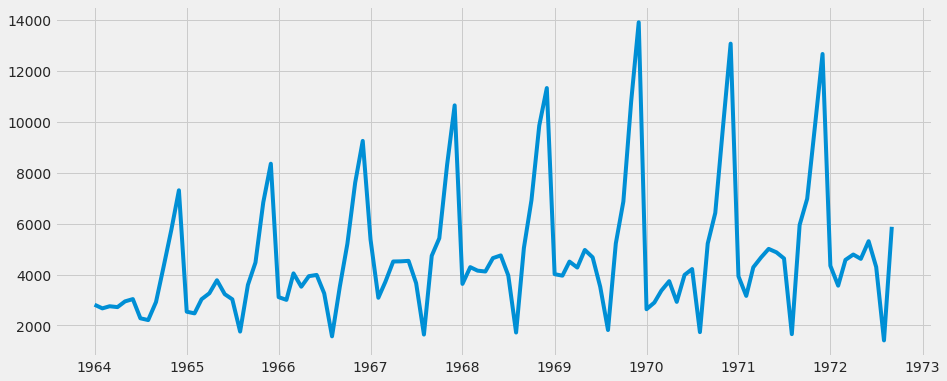

In [11]:
plt.figure(figsize=(14,6))
plt.plot(df)

## Testing for Stationarity: When a time series is stationary, it can be easier to model.
* adfuller is a function used to check Stationarity in dataset.

In [10]:
from statsmodels.tsa.stattools import adfuller
test_fuller = adfuller(df["Sales"])

In [12]:
"""
Hypothesis Test
Ho: It is non stationary.
H1: It is stationary.
"""

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ["ADF Test Statistic",'p-value',"#Lags Used","No. of observations"]
    for value,label in zip(result, labels):
        print(label,':',str(value))
        
    if result[1] <= 0.05:
        print("Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak Evidence against null hypothesis(H1), time series has a unit root, indicating it is non-stationary ")

In [13]:
adfuller_test(df["Sales"])

ADF Test Statistic : -1.8335930563276226
p-value : 0.3639157716602452
#Lags Used : 11
No. of observations : 93
Weak Evidence against null hypothesis(H1), time series has a unit root, indicating it is non-stationary 


**Differencing**:
* Differencing is a popular and widely used data transform for making time series data stationary.

* Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

* Differencing shifts ONE/MORE row towards downwards.

In [14]:
df["Seasonal First Difference"] = df["Sales"]- df["Sales"].shift(12)

In [15]:
df.head()

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN


In [16]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
No. of observations : 92
Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


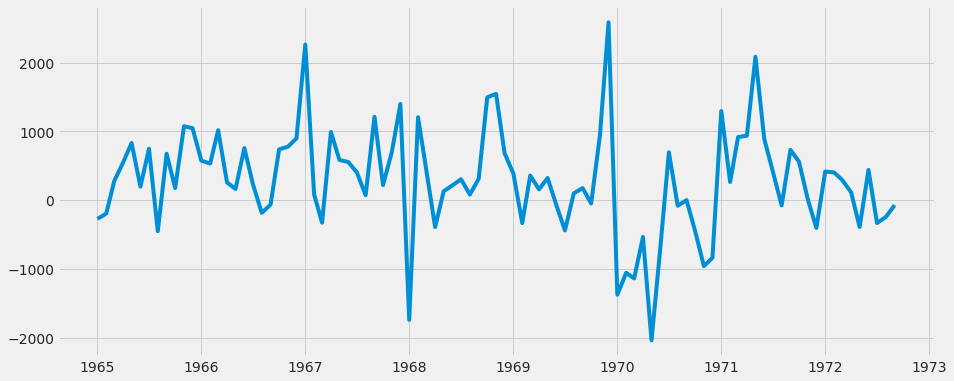

In [17]:
plt.figure(figsize=(14,6))
plt.plot(df["Seasonal First Difference"])

**Now our data is Stationary.**

------------------------------------------------

## Auto-Correlation and Partial Auto-Correlation

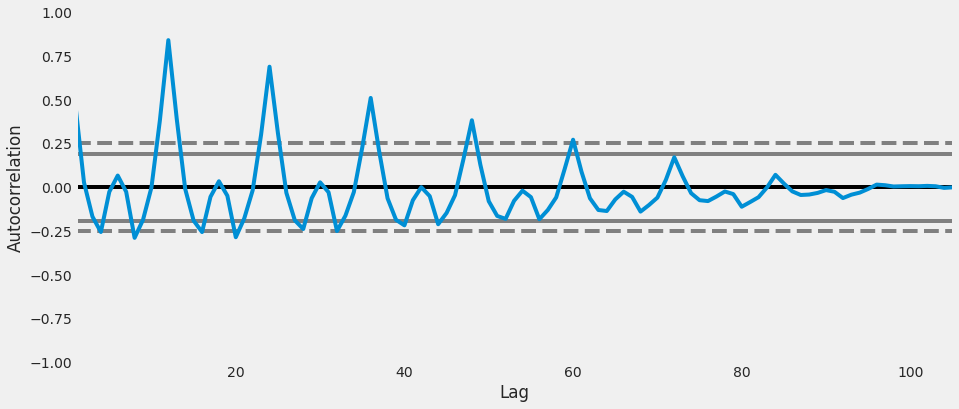

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(14,6))
autocorrelation_plot(df["Sales"])
plt.show()

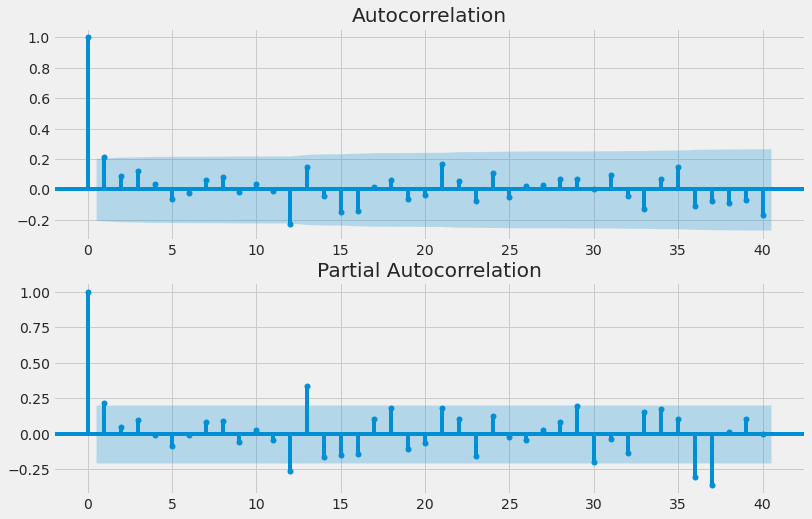

In [19]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig2 = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

**These graph will give us values of p and q.**
* Partial AutoCorrelation graph will give p value.
* While, AutoCorrelation graph will give q value.

## **6. How to find the order of the AR term (p)** 

The next step is to identify if the model needs any AR terms. We will find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.
* Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.
* Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.
* 𝑌𝑡=𝛼0+𝛼1𝑌𝑡−1+𝛼2𝑌𝑡−2+𝛼3𝑌𝑡−3

That is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient  𝛼3
α
3
  of Y_t-3 in the above equation.
Now, we should find the number of AR terms. Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

-----------------------------

## ARIMA MODEL

Let’s Break it Down:-

* AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

* I: Integrated. The use of differencing of raw observations in order to make the time series stationary.

* MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The parameters of the ARIMA model are defined as follows:

* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

In [20]:
 # For non-seasonal data
#p=1, d=1, q=0 or 1 depending upon performance
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df["Sales"], order=(1,1,1))
model_fit = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [21]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.263
Date:                Mon, 14 Jun 2021   AIC                           1910.251
Time:                        13:36:54   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7847     12.405      1.837      0.066      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -

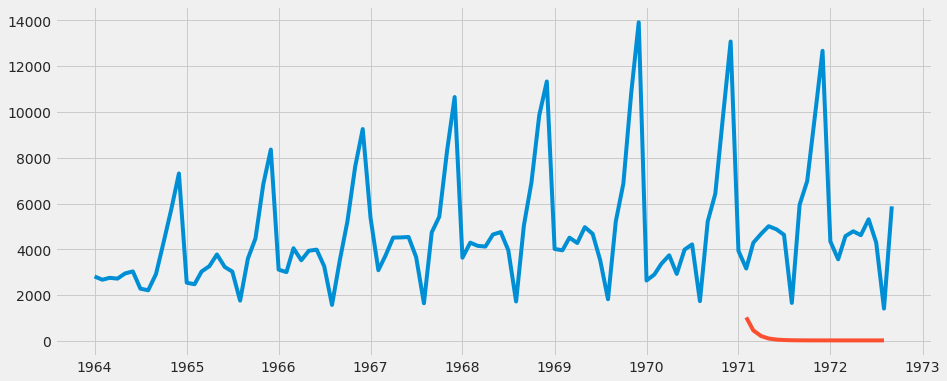

In [22]:
df["Forecast"] = model_fit.predict(start=85, end=103, dynamic=True)
plt.figure(figsize=(14,6))
plt.plot(df[["Sales","Forecast"]])

<div class="alert alert-box alert-info">
This model didn't work well because our data is seasonal which cannot be predicted by ARIMA and thus we have to use SARIMA.
    </div>

## SARIMA Model
* Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

* It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

* A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA.

* The seasonal part of the model consists of terms that are very similar to the non-seasonal components of the model, but they involve backshifts of the seasonal period.

In [23]:
import statsmodels.api as sm
model2 = sm.tsa.statespace.SARIMAX(df["Sales"], order=(1,1,1),seasonal_order=(1,1,1,12))
model2_fit = model2.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [24]:
print(model2_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Mon, 14 Jun 2021   AIC                           1486.804
Time:                                    13:37:19   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043   

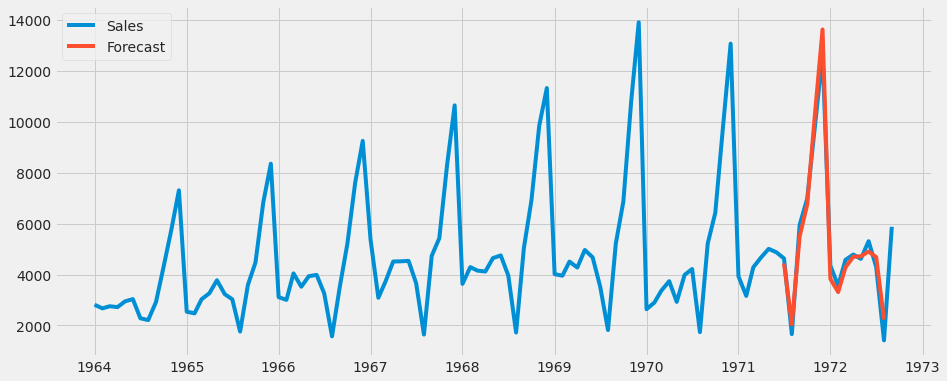

In [25]:
df["Forecast_SARIMA"] = model2_fit.predict(start=90, end=103, dynamic=True)
plt.figure(figsize=(14,6))
plt.plot(df[["Sales","Forecast_SARIMA"]])
plt.legend(labels=["Sales","Forecast"])

<div class="alert alert-box alert-info">
As we can observe from the graph above, SARIMA model predicted very well.
    </div>

--------

## Forecasting Future Sales

In [26]:
from pandas.tseries.offsets import DateOffset
#Here USING FOR LOOP we are adding some additional data for prediction purpose:
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

#Convert that list into DATAFRAME:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [27]:
future_datest_df.tail()

,Sales,Seasonal First Difference,Forecast,Forecast_SARIMA
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [28]:
#CONCATENATE THE ORIGINAL AND THE NEWLY CREATED DATASET FOR VISUALIZATION
future_df=pd.concat([df,future_datest_df])

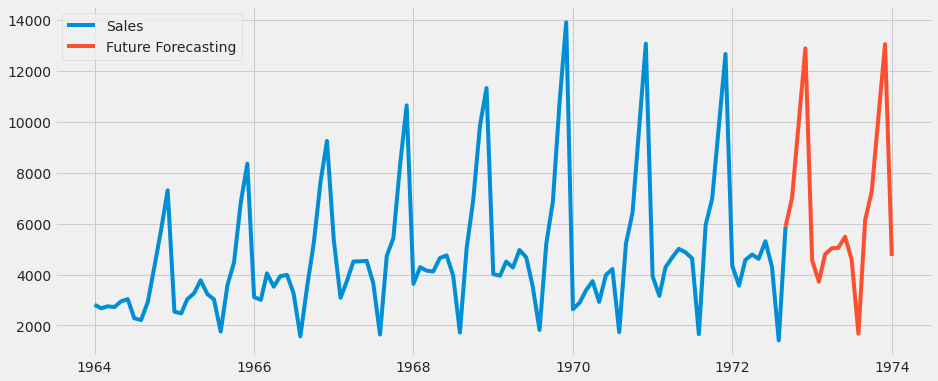

In [29]:
#PREDICT
future_df['Future_forecast'] = model2_fit.predict(start = 104, end = 120, dynamic= True) 
plt.figure(figsize=(14,6))
plt.plot(future_df[['Sales', 'Future_forecast']])
plt.legend(labels=["Sales","Future Forecasting"])

<div class="alert alert-box alert-warning">
 Hence, we have successfully predicted future seasonal sales for two years.
    </div>

## **Auto Arima Forecasting in Python** 

* In Python, the pmdarima package provides auto_arima() function which can be used to automate the process of ARIMA Forecasting in Python.

* auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

* We need to install the pmdarima package first.

In [30]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 865 kB/s eta 0:00:01


In [32]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.Sales, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1952.912, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2104.630, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1951.109, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2012.608, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1952.983, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1949.722, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1947.983, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1950.793, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1926.802, Time=0.24 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1926.054, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1925.737, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1998.274, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1926.708, Time=0.33 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1966.141, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0]          

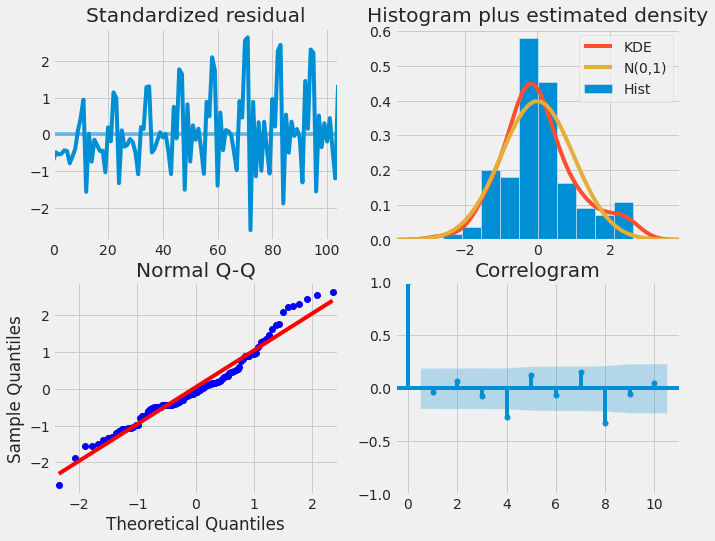

In [33]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

### **Interpretation of plots in plot diagnostics**
* Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

* Histogram: The density plot suggest normal distribution with mean slighlty shifted towards right.

* Theoretical Quantiles: Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

* Correlogram: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.

Overall, the model seems to be a good fit. So, let's use it to forecast.

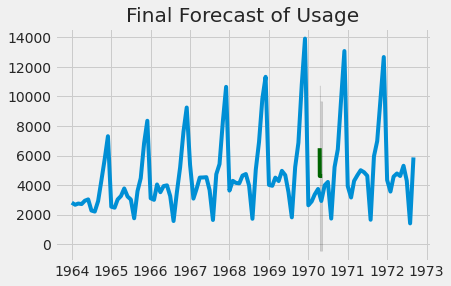

In [35]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Sales), len(df.Sales)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Sales)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

# SARIMA Model (Auto-ARIMA)

In [36]:
import pmdarima as pm
smodel = pm.auto_arima(df.Sales, start_p=1, start_q=1,test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1501.191, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1500.884, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1498.757, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1498.942, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1511.271, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1499.959, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1499.625, Time=0.41 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1500.741, Time=0.30 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1499.028, Time=0.16 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1501.490, Time=0.68 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1500.866, Time=0.32 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1500.295, Time=0.55 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1500.747, Time=0.24 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1498.167, Time=0.65 sec
 ARIMA(0,0,1)(0,1,0

In [37]:
print(smodel.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  105
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -745.083
Date:                             Mon, 14 Jun 2021   AIC                           1498.167
Time:                                     13:47:48   BIC                           1508.297
Sample:                                          0   HQIC                          1502.257
                                             - 105                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    362.8398    100.620      3.606      0.000     165.629     560.051
ma.L1          0.2191      

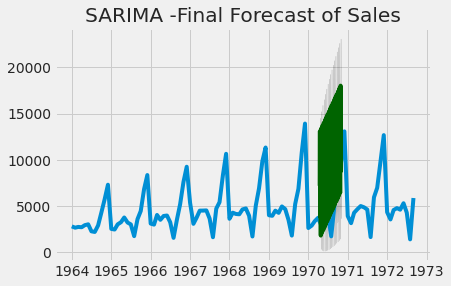

In [43]:
# Forecast
n_periods = 200
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Sales), len(df.Sales)+n_periods)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Sales)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA -Final Forecast of Sales")
plt.show()